In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import time
import os
import seaborn as sns

In [2]:
df = pd.read_csv("./data/definitivo.csv")
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio           1113 non-null   int64  
 1   tipo_vivienda       1113 non-null   int64  
 2   habitaciones        1113 non-null   float64
 3   metros_cuadrados    1113 non-null   float64
 4   aseos               1113 non-null   float64
 5   planta              1113 non-null   float64
 6   garaje              1113 non-null   int64  
 7   zona_centro         1113 non-null   int64  
 8   ascensor            1113 non-null   int64  
 9   piscina             1113 non-null   int64  
 10  reformado           1113 non-null   int64  
 11  terraza             1113 non-null   int64  
 12  aire_acondicionado  1113 non-null   int64  
 13  precio              1113 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 121.9 KB


In [3]:
df.describe() # Mostramos datos estadisticos descriptivos y nos fijamos principalmente en la media.

,municipio,tipo_vivienda,habitaciones,metros_cuadrados,aseos,planta,garaje,zona_centro,ascensor,piscina,reformado,terraza,aire_acondicionado,precio
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.00000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.00000,1.113000e+03
mean,1.762803,3.601977,3.393531,172.386343,1.977538,2.10602,0.197664,0.234501,0.080863,0.018868,0.000898,0.115903,0.01168,3.024951e+05
std,1.043729,1.784898,1.221669,137.437768,0.781093,1.92005,0.398416,0.423877,0.272746,0.136120,0.029975,0.320252,0.10749,2.699383e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.180000e+04
25%,1.000000,2.000000,3.000000,88.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.390000e+05
50%,1.000000,5.000000,3.000000,116.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.200000e+05
75%,3.000000,5.000000,4.000000,210.000000,2.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.500000e+05
max,5.000000,6.000000,11.000000,961.000000,11.000000,15.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000e+06


<Axes: >

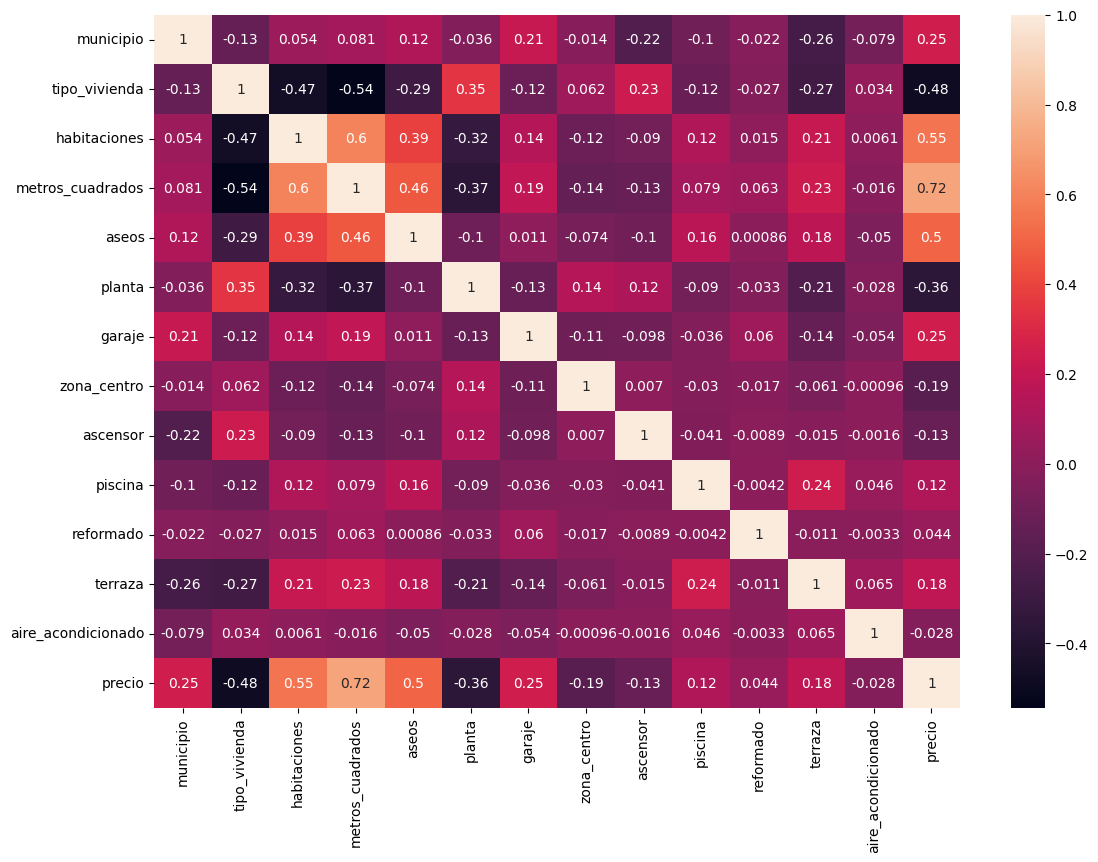

In [4]:
fig = plt.figure(figsize=(13,9))
sns.heatmap(df.corr(), annot=True) # Vemos las correlaciones importantes

#### Parece que existe **Multicolinealidad entre aseos y habitaciones**, por lo que valoraremos entrenar el modelo con tan sólo una de ellas

## Vamos a preparar **código para observar outliers**, *posiblemente eliminarlos* y hacer pruebas para tratar de obtener mejores métricas del modelo sin ellos:

In [5]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para mostrar los numeros completos sin anotacion cientifica

df["precio"].describe()

count      1113.00
mean     302495.07
std      269938.34
min       11800.00
25%      139000.00
50%      220000.00
75%      350000.00
max     2000000.00
Name: precio, dtype: float64

#### Detectamos los valores fuera del rango de los quartiles

In [6]:
Q1 = df["precio"].quantile(0.25)  # Primer cuartil (25%)
Q3 = df["precio"].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Límites para detectar outliers
lower_bound = max(0, Q1 - 1.5 * IQR)  # Ajustar límite inferior a 0 si es negativo
upper_bound = Q3 + 1.5 * IQR

print(f"Valores fuera de los límites: < {lower_bound} o > {upper_bound}")

# Filtrar outliers
outliers = df[df["precio"] > upper_bound]
print(f"Cantidad de outliers detectados: {len(outliers)}")

Valores fuera de los límites: < 0 o > 666500.0
Cantidad de outliers detectados: 101


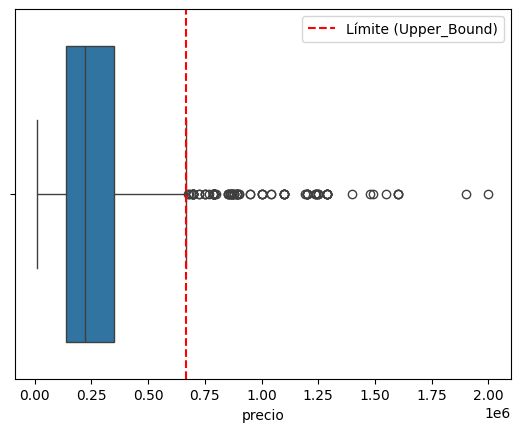

In [7]:
sns.boxplot(x=df["precio"])
plt.axvline(upper_bound, color='r', linestyle='--', label='Límite (Upper_Bound)')
plt.legend()
plt.show()

#### En caso de eliminarlos, ejecutar la siguiente celda para ajustar el limite de los outliers

Límite superior: 666500.0
Límite superior definitivo a filtrar: 1466300.0
Cantidad de outliers detectados ajustados: 8


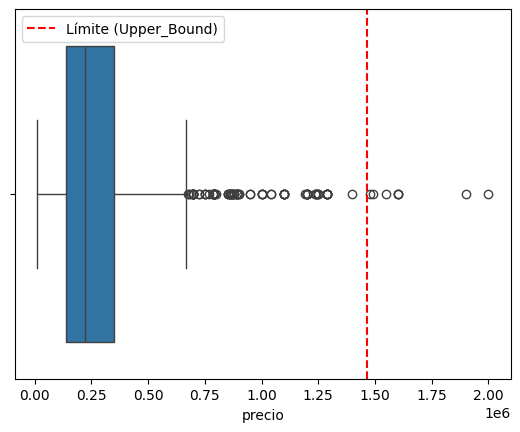

In [ ]:
# tolerancia = 1.2  # Incrementa el límite superior del upper_bound (ajusta según tu criterio)
# upper_bound_ajustado = upper_bound + (tolerancia * upper_bound)
# print(f"Límite superior: {upper_bound}")
# print(f"Límite superior definitivo a filtrar: {upper_bound_ajustado}")

# # Filtrar outliers
# outliers = df[df["precio"] > upper_bound_ajustado]
# print(f"Cantidad de outliers detectados ajustados: {len(outliers)}")

# # Visualizar
# sns.boxplot(x=df["precio"])
# plt.axvline(upper_bound_ajustado, color='r', linestyle='--', label='Límite (Upper_Bound)')
# plt.legend()
# plt.show()

#### Eliminamos

In [13]:
# # Filtrar los datos en el df con el límite ajustado
# print(f"Cantidad de datos antes de eliminar outliers: {len(df)}")
# df = df[df["precio"] <= upper_bound_ajustado]
# print(f"Cantidad de datos después de eliminar outliers: {len(df)}")

Cantidad de datos antes de eliminar outliers: 1113
Cantidad de datos después de eliminar outliers: 1111


<Axes: xlabel='precio', ylabel='Count'>

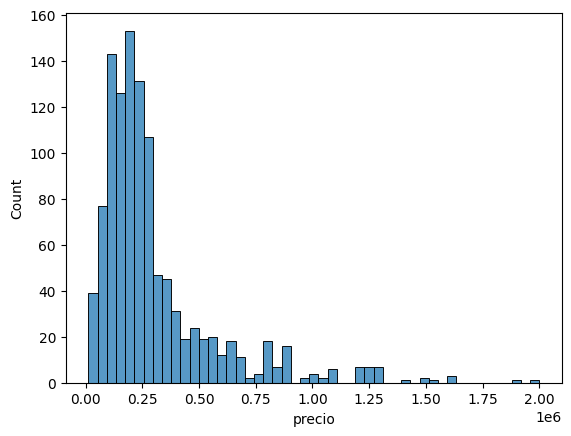

In [9]:
sns.histplot(df["precio"])

## Transformación logarítmica
### **La transformación logarítmica** se utiliza para reducir la escala de valores y **"comprimir" los outliers**, haciendo que los datos sean menos dispersos y más manejables, **estabiliza la varianza y mejora el rendimiento del modelo**, especialmente **cuando la distribución está sesgada** a la derecha.

<Axes: xlabel='precio', ylabel='Count'>

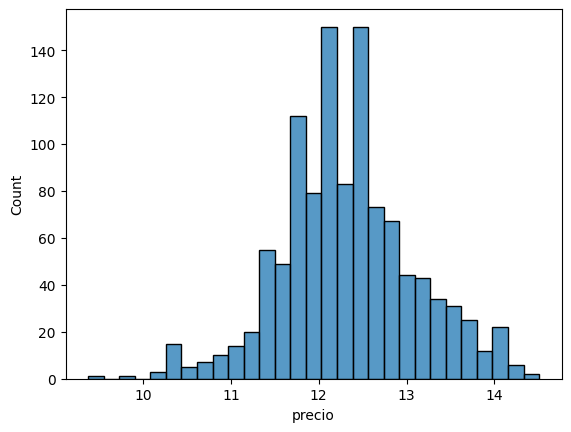

In [10]:
df['precio'] = np.log1p(df['precio'])  # logaritmo de 1 + precio
sns.histplot(df["precio"])

### **NORMALIZAR**, **proceso esencial en el preprocesamiento de datos antes de entrenar un modelo**. ***Se utiliza para ajustar las escalas de las características (columnas) de manera que todas tengan una magnitud comparable.*** 
####  Esto mejora la convergencia de los algoritmos de optimización y evita que una característica con una escala más grande domine el entrenamiento.

### Por lo que, primero **separamos los datos de train y de test**, con las **X** por un lado y la **Y** por otro, y seguidamente aplicamos la **NORMALIZACIÓN.**

In [11]:
df.columns

Index(['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado', 'precio'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]
print("Muestra de precio:", y[0],"\n")

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

# NORMALIZAMOS

# Creo el scaler con los datos de train
scaler = StandardScaler() # Z-score

scaler.fit(X_train) # Lo "entreno". Calculo su media y std para cada feature solo en el conjunto de entrenamiento.
'''Los targets (y_train) no deben escalarse en este contexto porque no son características, son valores a predecir.'''

X_train = scaler.transform(X_train) # Aplico el scaler y sobreescribo los datos de train
print("X_train", X_train[0],"\n") # Se muestra la primera fila de ejemplo para ver la normalización

# Aplico el mismo scaler con los datos de test
X_test = scaler.transform(X_test)
print("X_test", X_test[0],"\n")

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)

Muestra de precio: 12.345838935721968 

X_train [ 2.16337704  0.79659111 -0.32522756 -0.59390825 -1.23975372  1.50465089
 -0.48944286 -0.55571893 -0.29217435 -0.13530202  0.         -0.36375201
 -0.10660036] 

X_test [ 1.19777746  0.79659111  0.49243495 -0.45071836  0.027044    0.4596729
 -0.48944286 -0.55571893 -0.29217435 -0.13530202  0.         -0.36375201
 -0.10660036] 

Total shape: (1113, 13)
Train features shape (X): (890, 13)
Train target shape (y): (890,)
Test features shape (X): (223, 13)
Test target shape (y): (223,)


## **Instanciamos y entrenamos** el modelo

In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression() # Instanciamos el modelo

# Entrenamos los datos con el modelo
lm.fit(X_train, y_train) # Aquí el modelo ajusta los coeficientes para minimizar el error cuadrático medio.

LinearRegression()

## Evaluación del modelo
### **Comprobamos los coeficientes** que nos ha devuelto el modelo
### *Los coeficientes representan la magnitud y dirección del impacto de cada variable independiente en la variable dependiente*

In [14]:
print(lm.intercept_) # Coeficiente de la C
print(lm.coef_) # Coeficientes de la M

12.32727564872975
[ 1.18003874e-01 -1.26874876e-01  8.83092243e-02  2.74449869e-01
  1.28602847e-01 -3.03409293e-02  1.37263302e-01 -3.87071455e-02
  5.68435890e-02  6.84235631e-03  6.93889390e-18  7.83645922e-02
 -4.02675328e-03]


### Vamos a observar los coeficientes **por columna respecto al target**

In [15]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para mostrar los numeros completos sin anotacion cientifica

coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coeficientes'])

coeff_df.sort_values(ascending=False, by="Coeficientes") # En orden Descendente

,Coeficientes
metros_cuadrados,0.27
garaje,0.14
aseos,0.13
municipio,0.12
habitaciones,0.09
terraza,0.08
ascensor,0.06
piscina,0.01
reformado,0.00
aire_acondicionado,-0.00


In [16]:
# pd.reset_option('display.float_format') # Resetea el mostrar los numeros completos sin anotacion cientifica

#### Los coeficientes del modelo de regresión lineal (lm.coef_) indican cuánto cambia el target (precio) en promedio, por cada unidad adicional de la variable independiente, manteniendo todo lo demás constante.



## Realizamos predicciones


In [17]:
predicciones_log = lm.predict(X_test)
predicciones_log[:10] # Verifica si están en escala logarítmica, ya que anteriormente el target fue transformado con Log1

array([12.18558632, 12.32954095, 11.69525429, 11.86355278, 12.08289763,
       11.89998547, 11.89544823, 11.82261268, 13.53100013, 11.98958906])

In [18]:
y_test[:10] # Verifica si tambien está en escala logarítmica

879    12.25
101    12.43
1043   11.15
726    11.22
291    11.07
868    12.18
951    12.43
260    11.70
128    14.07
1034   11.76
Name: precio, dtype: float64

### **Invertimos las predicciones** (precio) a escala original para visualizarlas.
### Tambien se podría hacer posteriormente pero **siempre antes de comprobar las metricas**

In [19]:
y_pred = np.expm1(predicciones_log) # Transformación inversa para volver a la escala original
y_test = np.expm1(y_test)  # Transformación inversa para las métricas

In [20]:
y_pred[:10] # Verifica si se invierte la escala logarítmica

array([195943.41842985, 226281.82903905, 119999.87159313, 141994.80255132,
       176820.78368448, 147263.48617831, 146596.82450165, 136298.87173193,
       752381.50767827, 161068.15151493])

In [21]:
y_test[:10] # Verifica si se invierte la escala logarítmica

879     210000.00
101     250000.00
1043     69900.00
726      74900.00
291      64000.00
868     195000.00
951     250000.00
260     120000.00
128    1290000.00
1034    128000.00
Name: precio, dtype: float64

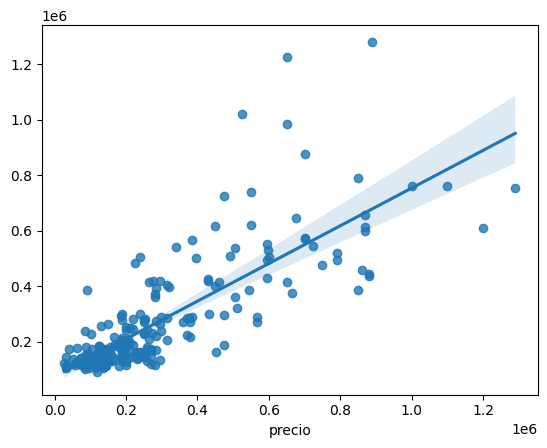

In [22]:
sns.regplot(x=y_test, y=y_pred);

## **Comprobamos métricas** para evaluar

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))

RMSE: 146821.04824182915
R2: 0.6190700720644841


## Vamos a **repetir todo el proceso** pero eliminando poco a poco las columnas que (en el heatmap) parecian menos relevantes, y tambien teniendo en cuenta las que puedan tener multicolinealidad, así **hasta obtener las mejores métricas posibles**.

#### Lo primero, comprobar que la distribucion del target continua con logaritmo, ya que estaba sesgado a la derecha y necesitamos una distribucion uniforme para obtener el mejor modelo.

<Axes: xlabel='precio', ylabel='Count'>

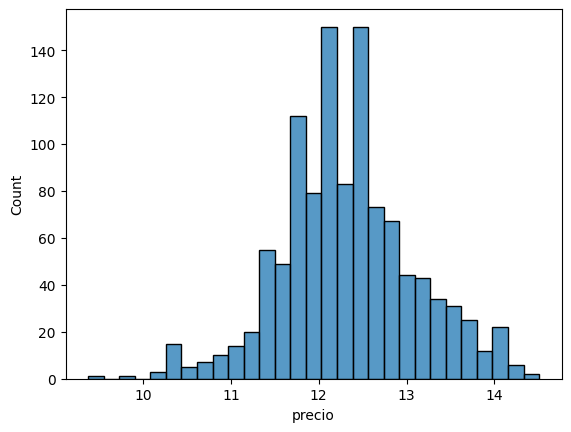

In [24]:
sns.histplot(df["precio"])

#### Recordamos los coefficientes de las features para el modelo entrenado

In [25]:
coeff_df.sort_values(ascending=False, by="Coeficientes") # En orden Descendente

,Coeficientes
metros_cuadrados,0.27
garaje,0.14
aseos,0.13
municipio,0.12
habitaciones,0.09
terraza,0.08
ascensor,0.06
piscina,0.01
reformado,0.00
aire_acondicionado,-0.00


### TESTER 1

Muestra de precio: 12.345838935721968 

X_train [ 2.16337704  0.79659111 -0.59390825 -1.23975372  1.50465089 -0.48944286
 -0.55571893 -0.29217435 -0.13530202  0.         -0.36375201 -0.10660036] 

X_test [ 1.19777746  0.79659111 -0.45071836  0.027044    0.4596729  -0.48944286
 -0.55571893 -0.29217435 -0.13530202  0.         -0.36375201 -0.10660036] 

Total shape: (1113, 12)
Train features shape (X): (890, 12)
Train target shape (y): (890,)
Test features shape (X): (223, 12)
Test target shape (y): (223,)

Predicciones_log: [12.10777778 12.33171633 11.74792714 11.91392373 12.08430851 11.97052924
 11.8970565  11.81257907 13.59003534 11.96899924] 

y_pred (Pred. Transf. Inversa): [181275.32155772 226774.6159554  126490.08911393 149330.46719321
 177070.43375196 158027.27263387 146832.78288526 134938.13002007
 798135.83627034 157785.67492966] 

y_test (En Escala Log.): 879   12.25
Name: precio, dtype: float64 

y_test (Transf. Inversa): 879   210000.00
Name: precio, dtype: float64 

--------

<Axes: xlabel='precio'>

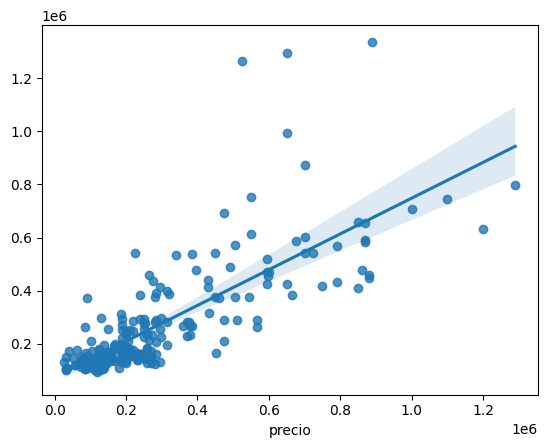

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)
'''En esta prueba descartamos las columnas: 'habitaciones' ( por multicolinealidad ) '''

X = df[['municipio', 'tipo_vivienda', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]
print("Muestra de precio:", y[0],"\n")

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

# NORMALIZAMOS

# Creo el scaler con los datos de train
scaler = StandardScaler() # Z-score

scaler.fit(X_train) # Lo "entreno". Calculo su media y std para cada feature solo en el conjunto de entrenamiento.
'''Los targets (y_train) no deben escalarse en este contexto porque no son características, son valores a predecir.'''

X_train = scaler.transform(X_train) # Aplico el scaler y sobreescribo los datos de train
print("X_train", X_train[0],"\n") # Se muestra la primera fila de ejemplo para ver la normalización

# Aplico el mismo scaler con los datos de test
X_test = scaler.transform(X_test)
print("X_test", X_test[0],"\n")

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.linear_model import LinearRegression

lm = LinearRegression() # Instanciamos el modelo

# Entrenamos los datos con el modelo
lm.fit(X_train, y_train) # Aquí el modelo ajusta los coeficientes para minimizar el error cuadrático medio.

predicciones_log = lm.predict(X_test)
print("Predicciones_log:", predicciones_log[:10], "\n")

y_pred = np.expm1(predicciones_log) # Transformación inversa para volver a la escala original
print("y_pred (Pred. Transf. Inversa):", y_pred[:10], "\n")

print("y_test (En Escala Log.):", y_test[:1], "\n")

y_test = np.expm1(y_test)  # Transformación inversa para las métricas
print("y_test (Transf. Inversa):", y_test[:1], "\n")

from sklearn.metrics import mean_squared_error, r2_score
print("-----------> RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("-----------> R2:", r2_score(y_test, y_pred))

sns.regplot(x=y_test, y=y_pred)

In [28]:
coeff_df.sort_values(ascending=False, by="Coeficientes") # En orden Descendente

,Coeficientes
metros_cuadrados,0.27
garaje,0.14
aseos,0.13
municipio,0.12
habitaciones,0.09
terraza,0.08
ascensor,0.06
piscina,0.01
reformado,0.00
aire_acondicionado,-0.00


### TESTER 2

Muestra de precio: 12.345838935721968 

X_train [ 2.16337704  0.79659111 -0.32522756 -0.59390825 -1.23975372  1.50465089
 -0.48944286 -0.55571893 -0.29217435 -0.36375201] 

X_test [ 1.19777746  0.79659111  0.49243495 -0.45071836  0.027044    0.4596729
 -0.48944286 -0.55571893 -0.29217435 -0.36375201] 

Total shape: (1113, 10)
Train features shape (X): (890, 10)
Train target shape (y): (890,)
Test features shape (X): (223, 10)
Test target shape (y): (223,)

Predicciones_log: [12.18528481 12.32985551 11.69523959 11.86314656 12.08228479 11.89956055
 11.89540287 11.82273362 13.48146537 11.98936532] 

y_pred (Pred. Transf. Inversa): [195884.34843057 226353.01858388 119998.10860825 141937.13286479
 176712.45290582 147200.92376586 146590.17449325 136315.35788616
 716020.4235046  161032.11674285] 

y_test (En Escala Log.): 879   12.25
Name: precio, dtype: float64 

y_test (Transf. Inversa): 879   210000.00
Name: precio, dtype: float64 

-----------> RMSE: 147849.1526611461
-----------> R2: 0.6

<Axes: xlabel='precio'>

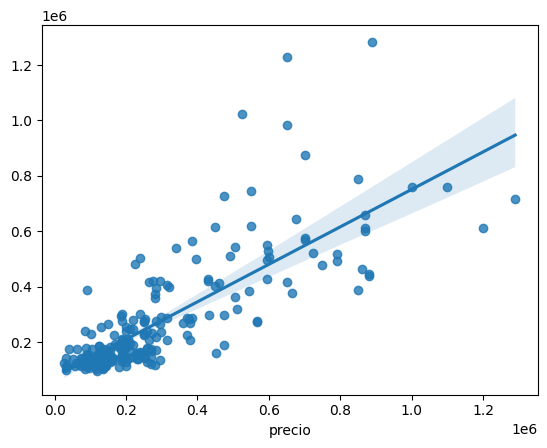

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)
'''En esta prueba descartamos las columnas: 'aire_acondicionado', reformado , 'piscina' '''

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'terraza']]

# La columna del target (y)
y = df["precio"]
print("Muestra de precio:", y[0],"\n")

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

# NORMALIZAMOS

# Creo el scaler con los datos de train
scaler = StandardScaler() # Z-score

scaler.fit(X_train) # Lo "entreno". Calculo su media y std para cada feature solo en el conjunto de entrenamiento.
'''Los targets (y_train) no deben escalarse en este contexto porque no son características, son valores a predecir.'''

X_train = scaler.transform(X_train) # Aplico el scaler y sobreescribo los datos de train
print("X_train", X_train[0],"\n") # Se muestra la primera fila de ejemplo para ver la normalización

# Aplico el mismo scaler con los datos de test
X_test = scaler.transform(X_test)
print("X_test", X_test[0],"\n")

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.linear_model import LinearRegression

lm = LinearRegression() # Instanciamos el modelo

# Entrenamos los datos con el modelo
lm.fit(X_train, y_train) # Aquí el modelo ajusta los coeficientes para minimizar el error cuadrático medio.

predicciones_log = lm.predict(X_test)
print("Predicciones_log:", predicciones_log[:10], "\n")

y_pred = np.expm1(predicciones_log) # Transformación inversa para volver a la escala original
print("y_pred (Pred. Transf. Inversa):", y_pred[:10], "\n")

print("y_test (En Escala Log.):", y_test[:1], "\n")

y_test = np.expm1(y_test)  # Transformación inversa para las métricas
print("y_test (Transf. Inversa):", y_test[:1], "\n")

from sklearn.metrics import mean_squared_error, r2_score
print("-----------> RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("-----------> R2:", r2_score(y_test, y_pred))

sns.regplot(x=y_test, y=y_pred)

### Después de probar, **el mejor Score está en el TESTER 2**:
- ### **SIN LAS COLUMNAS 'aire_acondicionado', 'reformado' y 'piscina'**, que son las menos relevantes,
- ### **SIN ELIMINAR LOS OUTLIERS** en el precio.
### -----------> RMSE: 147849.1526611461
### -----------> R2: 0.6137165216245266

In [64]:
# Transformar de nuevo a la escala original toda la columna PRECIO del df
# df['precio'] = np.expm1(df['precio'])

### ***Seguimos probando con RandomForestRegressor()***